In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [92]:
df = pd.read_csv("datos_ninos/obs_aire_menores5anos.csv",encoding='ISO8859-1', sep=";")
df.head()

,Año encuesta,Localidad,Sexo,Aseguramiento,Estrato,Casos de sibilancia último año,Casos de tos último año diferente gripa,Casos de mocos o nariz tapada último año,Casos de ausentismo escolar,Casos de asistencia al colegio,Registros
0,2019,Antonio Nariño,Hombre,Contributivo (EPS),2,0,0,0,0,1,1
1,2019,Antonio Nariño,Hombre,Contributivo (EPS),3,2,4,2,6,12,27
2,2019,Antonio Nariño,Hombre,Ninguno,3,0,0,1,0,0,2
3,2019,Antonio Nariño,Hombre,Régimen excepcional,3,0,0,0,0,0,1
4,2019,Antonio Nariño,Hombre,Subsidiado (EPSS),3,0,4,1,4,6,12


In [93]:
df.value_counts(["Localidad"]).sort_index()

Localidad     
Antonio Nariño    53
Barrios Unidos    46
Bosa              73
Candelaria        43
Chapinero         70
Ciudad Bolívar    77
Engativá          77
Fontibón          92
Kennedy           86
Mártires          57
Puente Aranda     39
Rafael Uribe      87
San Cristóbal     84
Santa Fe          73
Suba              91
Sumapaz            5
Teusaquillo       48
Tunjuelito        56
Usaquén           91
Usme              63
Name: count, dtype: int64

In [94]:
df.columns
len(df)

1311

In [95]:
print("Eliminar registros 2019")

filas_antes = len(df)
df = df[df['Año encuesta'] != 2019].copy()
filas_despues = len(df)

print(f"Filas antes: {filas_antes:,}")
print(f"Filas después: {filas_despues:,}")
print(f"Filas eliminadas: {filas_antes - filas_despues:,}")





Eliminar registros 2019
Filas antes: 1,311
Filas después: 1,058
Filas eliminadas: 253


In [96]:
print("\n" + "="*60)
print("ESTANDARIZANDO NOMBRES DE LOCALIDADES")
print("="*60)

print("\nLocalidades ANTES de estandarizar:")
print(df['Localidad'].value_counts().sort_index())

# Convertir a mayúsculas y remover espacios extras
df['Localidad'] = df['Localidad'].str.upper().str.strip()

# Normalizar nombres específicos para compatibilidad
df['Localidad'] = df['Localidad'].replace({
    'ANTONIO NARIÑO': 'ANTONIO NARINO',  # Remover tilde
    'MÁRTIRES': 'MARTIRES',              # Remover tilde
    'TUNJELITO': 'TUNJUELITO'            # Corregir ortografía si aplica
})

print("\nLocalidades DESPUÉS de estandarizar:")
print(df['Localidad'].value_counts().sort_index())


ESTANDARIZANDO NOMBRES DE LOCALIDADES

Localidades ANTES de estandarizar:
Localidad
Antonio Nariño    42
Barrios Unidos    38
Bosa              56
Candelaria        34
Chapinero         60
Ciudad Bolívar    62
Engativá          64
Fontibón          73
Kennedy           69
Mártires          45
Puente Aranda     30
Rafael Uribe      67
San Cristóbal     68
Santa Fe          59
Suba              76
Sumapaz            5
Teusaquillo       39
Tunjuelito        49
Usaquén           71
Usme              51
Name: count, dtype: int64

Localidades DESPUÉS de estandarizar:
Localidad
ANTONIO NARINO    42
BARRIOS UNIDOS    38
BOSA              56
CANDELARIA        34
CHAPINERO         60
CIUDAD BOLÍVAR    62
ENGATIVÁ          64
FONTIBÓN          73
KENNEDY           69
MARTIRES          45
PUENTE ARANDA     30
RAFAEL URIBE      67
SAN CRISTÓBAL     68
SANTA FE          59
SUBA              76
SUMAPAZ            5
TEUSAQUILLO       39
TUNJUELITO        49
USAQUÉN           71
USME              51
N

In [97]:
print("\n" + "="*60)
print("ELIMINANDO LOCALIDADES NO COMPATIBLES")
print("="*60)

# Lista de localidades a eliminar (no están en SISAIRE)
localidades_eliminar = [
    'ANTONIO NARINO',
    'CANDELARIA',
    'CHAPINERO',
    'MARTIRES',
    'RAFAEL URIBE',
    'RAFAEL URIBE URIBE',  # Por si tiene nombre completo
    'SUMAPAZ',
    'TEUSAQUILLO'
]

filas_antes_filtro = len(df)
print(f"\nLocalidades a eliminar: {localidades_eliminar}")

# Verificar cuántas filas se eliminarán
filas_por_eliminar = df[df['Localidad'].isin(localidades_eliminar)]
print(f"\nRegistros por localidad a eliminar:")
print(filas_por_eliminar['Localidad'].value_counts().sort_index())

# Eliminar las localidades
df = df[~df['Localidad'].isin(localidades_eliminar)].copy()

filas_despues_filtro = len(df)
print(f"\nResumen:")
print(f"   Filas antes del filtro: {filas_antes_filtro:,}")
print(f"   Filas después del filtro: {filas_despues_filtro:,}")
print(f"   Filas eliminadas: {filas_antes_filtro - filas_despues_filtro:,} ({(filas_antes_filtro - filas_despues_filtro)/filas_antes_filtro*100:.2f}%)")



ELIMINANDO LOCALIDADES NO COMPATIBLES

Localidades a eliminar: ['ANTONIO NARINO', 'CANDELARIA', 'CHAPINERO', 'MARTIRES', 'RAFAEL URIBE', 'RAFAEL URIBE URIBE', 'SUMAPAZ', 'TEUSAQUILLO']

Registros por localidad a eliminar:
Localidad
ANTONIO NARINO    42
CANDELARIA        34
CHAPINERO         60
MARTIRES          45
RAFAEL URIBE      67
SUMAPAZ            5
TEUSAQUILLO       39
Name: count, dtype: int64

Resumen:
   Filas antes del filtro: 1,058
   Filas después del filtro: 766
   Filas eliminadas: 292 (27.60%)


In [98]:
print("\n" + "="*60)
print("LOCALIDADES FINALES EN EL DATASET")
print("="*60)

df["Localidad"] = df["Localidad"].str.replace("CIUDAD BOLÍVAR", "CIUDAD BOLIVAR", regex=False)
df["Localidad"] = df["Localidad"].str.replace("SAN CRISTÓBAL", "SAN CRISTOBAL", regex=False)
df["Localidad"] = df["Localidad"].str.replace("USAQUÉN", "USAQUEN", regex=False)
print("\nLocalidades restantes:")
print(df['Localidad'].value_counts().sort_index())

print(f"\nTotal de localidades únicas: {df['Localidad'].nunique()}")
print(f"Localidades: {sorted(df['Localidad'].unique())}")



LOCALIDADES FINALES EN EL DATASET

Localidades restantes:
Localidad
BARRIOS UNIDOS    38
BOSA              56
CIUDAD BOLIVAR    62
ENGATIVÁ          64
FONTIBÓN          73
KENNEDY           69
PUENTE ARANDA     30
SAN CRISTOBAL     68
SANTA FE          59
SUBA              76
TUNJUELITO        49
USAQUEN           71
USME              51
Name: count, dtype: int64

Total de localidades únicas: 13
Localidades: ['BARRIOS UNIDOS', 'BOSA', 'CIUDAD BOLIVAR', 'ENGATIVÁ', 'FONTIBÓN', 'KENNEDY', 'PUENTE ARANDA', 'SAN CRISTOBAL', 'SANTA FE', 'SUBA', 'TUNJUELITO', 'USAQUEN', 'USME']


In [99]:
print("\n" + "="*60)
print("VALORES FALTANTES")
print("="*60)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje (%)': missing_percent.values
})
print(missing_df)


VALORES FALTANTES
                                     Columna  Valores Faltantes  \
0                               Año encuesta                  0   
1                                  Localidad                  0   
2                                       Sexo                  0   
3                              Aseguramiento                  0   
4                                    Estrato                  0   
5             Casos de sibilancia último año                  0   
6    Casos de tos último año diferente gripa                  0   
7   Casos de mocos o nariz tapada último año                  0   
8                Casos de ausentismo escolar                  0   
9             Casos de asistencia al colegio                  0   
10                                 Registros                  0   

    Porcentaje (%)  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7       

In [100]:
df.describe()

,Año encuesta,Estrato,Casos de sibilancia último año,Casos de tos último año diferente gripa,Casos de mocos o nariz tapada último año,Casos de ausentismo escolar,Casos de asistencia al colegio,Registros
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,2021.502611,2.356397,0.898172,0.983029,2.813316,0.503916,5.364230,15.099217
std,1.116422,0.927223,1.685020,2.350575,4.847249,1.246951,7.932837,22.660912
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2021.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2021.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000
75%,2023.000000,3.000000,1.000000,1.000000,3.000000,0.000000,7.000000,20.000000
max,2023.000000,6.000000,13.000000,26.000000,34.000000,10.000000,45.000000,144.000000


In [101]:
print("\n" + "="*60)
print("VALORES ÚNICOS")
print("="*60)

df.rename(columns={"Año encuesta": "Año"}, inplace=True)

print(f"\nLocalidades únicas: {df['Localidad'].nunique()}")
print(sorted(df['Localidad'].unique()))

print(f"\nAños únicos: {df['Año'].nunique()}")
print(sorted(df['Año'].unique()))


VALORES ÚNICOS

Localidades únicas: 13
['BARRIOS UNIDOS', 'BOSA', 'CIUDAD BOLIVAR', 'ENGATIVÁ', 'FONTIBÓN', 'KENNEDY', 'PUENTE ARANDA', 'SAN CRISTOBAL', 'SANTA FE', 'SUBA', 'TUNJUELITO', 'USAQUEN', 'USME']

Años únicos: 4
[2020, 2021, 2022, 2023]


In [102]:
print("\n" + "="*60)
print("DISTRIBUCIÓN DE DATOS")
print("="*60)

# Conteo por localidad
print(f"\nRegistros por Localidad:")
print(df['Localidad'].value_counts().sort_index())

# Conteo por año
print(f"\nRegistros por Año:")
print(df['Año'].value_counts().sort_index())


DISTRIBUCIÓN DE DATOS

Registros por Localidad:
Localidad
BARRIOS UNIDOS    38
BOSA              56
CIUDAD BOLIVAR    62
ENGATIVÁ          64
FONTIBÓN          73
KENNEDY           69
PUENTE ARANDA     30
SAN CRISTOBAL     68
SANTA FE          59
SUBA              76
TUNJUELITO        49
USAQUEN           71
USME              51
Name: count, dtype: int64

Registros por Año:
Año
2020    188
2021    198
2022    187
2023    193
Name: count, dtype: int64


In [103]:
df.columns

Index(['Año', 'Localidad', 'Sexo', 'Aseguramiento', 'Estrato',
       'Casos de sibilancia último año',
       'Casos de tos último año diferente gripa',
       'Casos de mocos o nariz tapada último año',
       'Casos de ausentismo escolar', 'Casos de asistencia al colegio',
       'Registros'],
      dtype='object')


GENERANDO VISUALIZACIONES


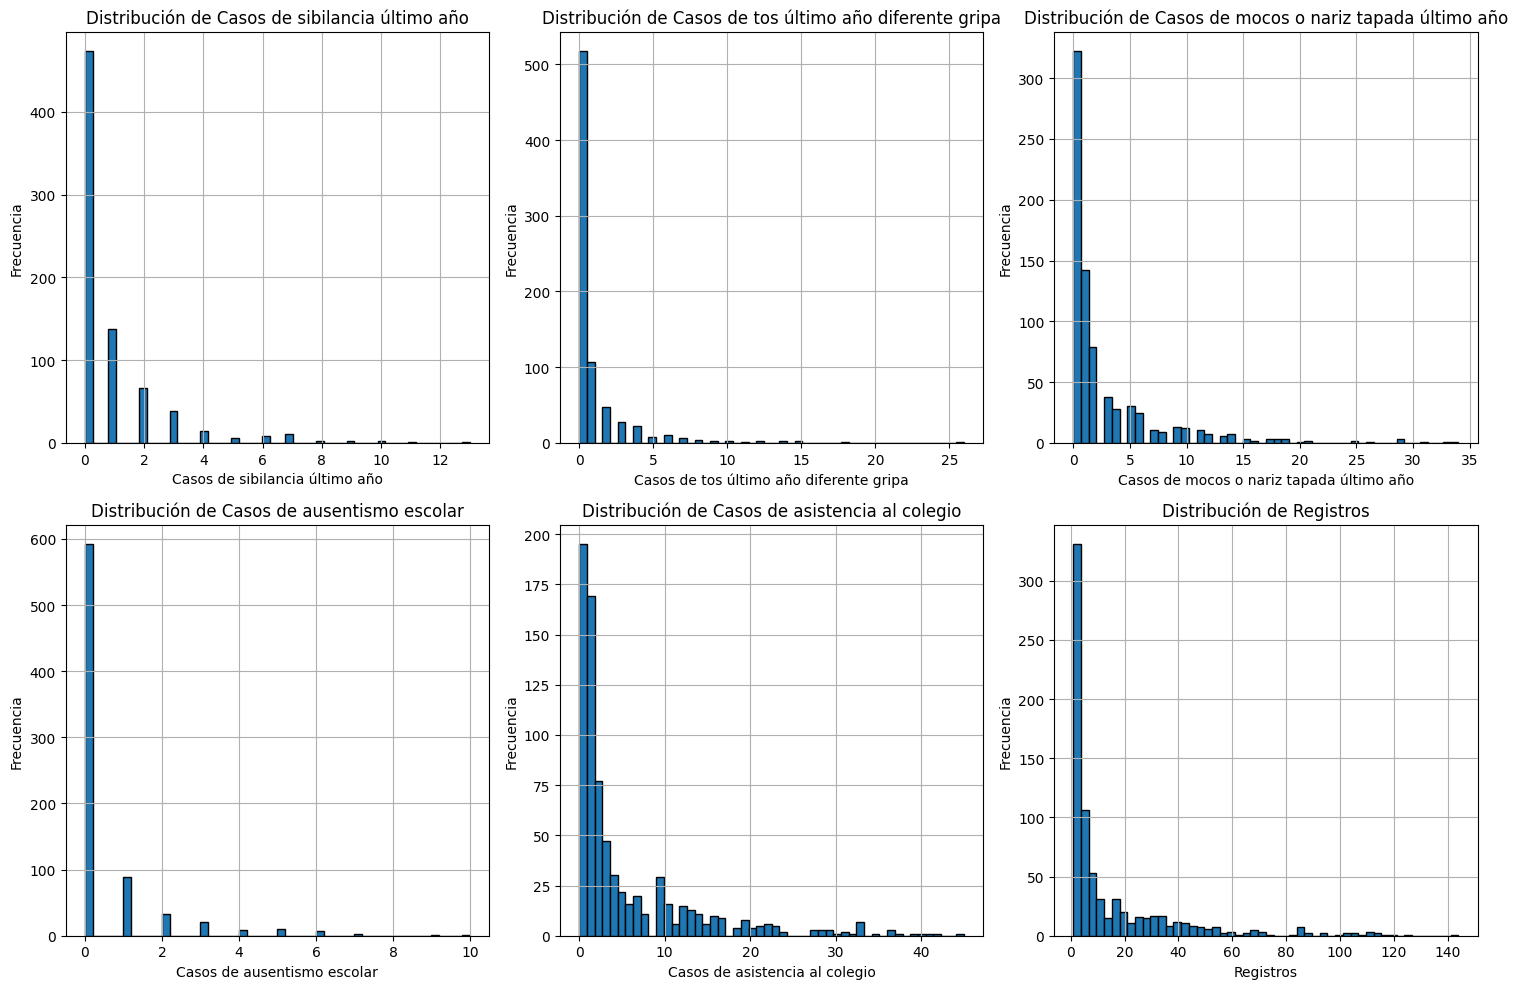

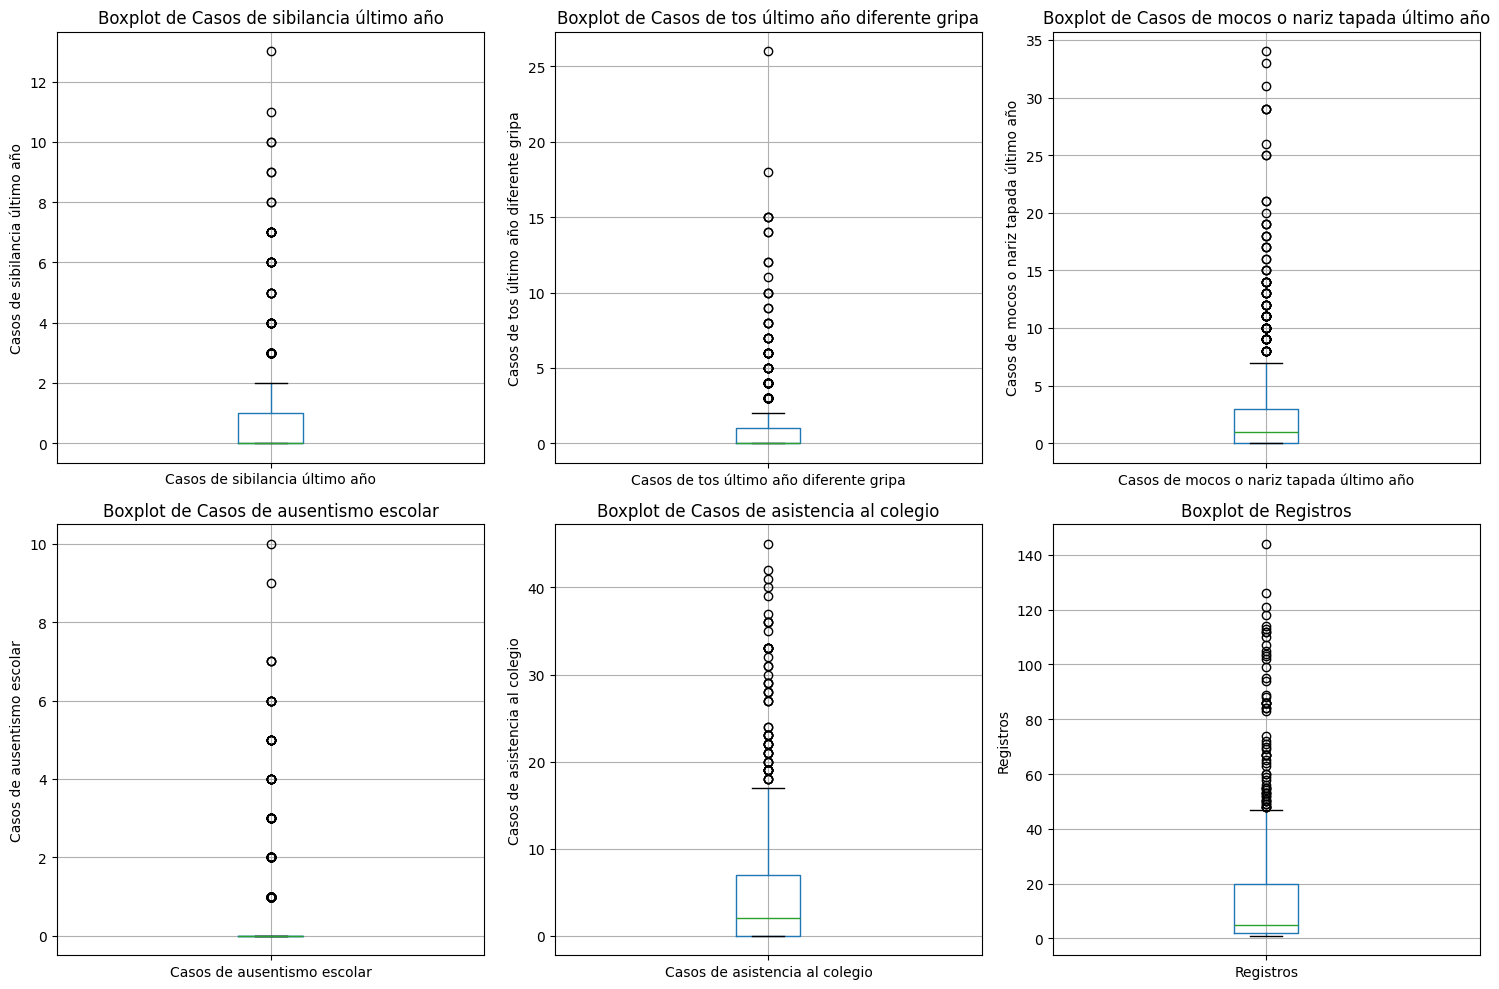

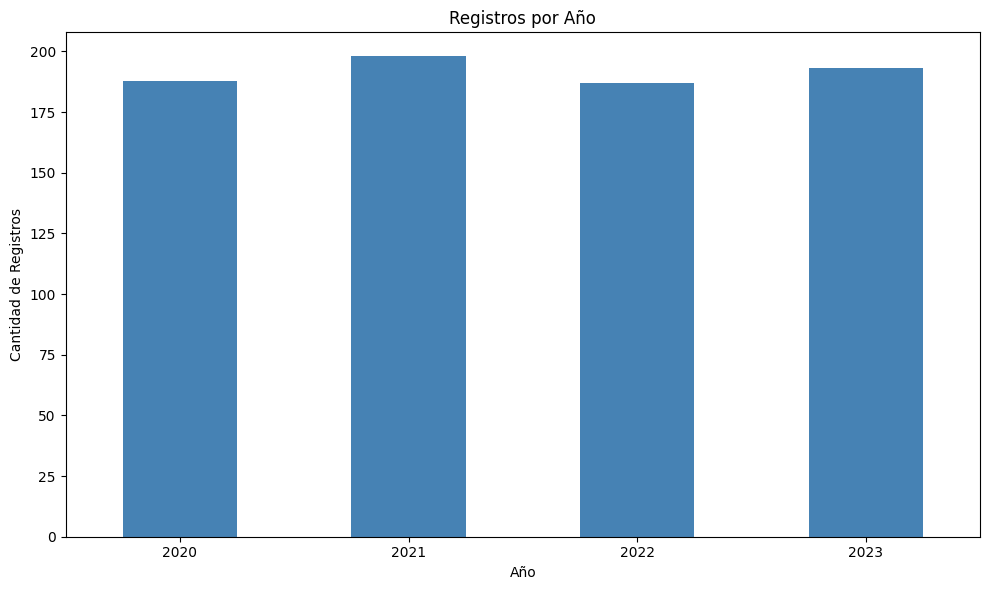

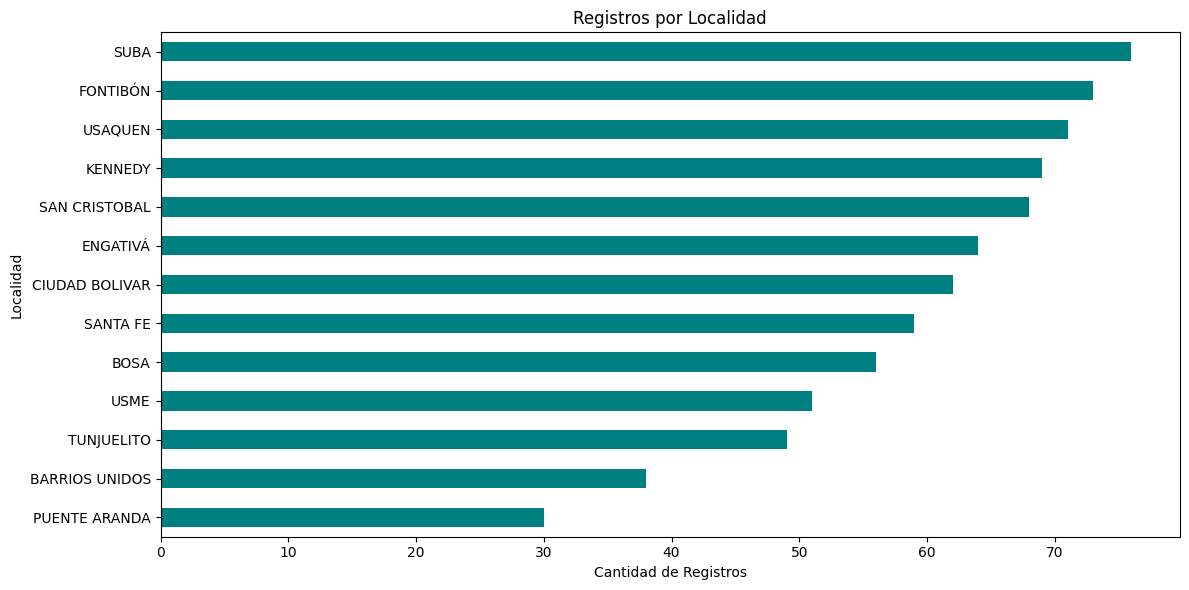

In [104]:
print("\n" + "="*60)
print("GENERANDO VISUALIZACIONES")
print("="*60)

features = [ 'Casos de sibilancia último año',
       'Casos de tos último año diferente gripa',
       'Casos de mocos o nariz tapada último año',
       'Casos de ausentismo escolar', 'Casos de asistencia al colegio',
       'Registros']

# 1. Distribución de contaminantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, contaminante in enumerate(features):
    df[contaminante].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribución de {contaminante}')
    axes[idx].set_xlabel(contaminante)
    axes[idx].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 2. Boxplots de contaminantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, contaminante in enumerate(features):
    df.boxplot(column=contaminante, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {contaminante}')
    axes[idx].set_ylabel(contaminante)

plt.tight_layout()
plt.show()

# 3. Registros por año
plt.figure(figsize=(10, 6))
df['Año'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Registros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Registros por localidad
plt.figure(figsize=(12, 6))
df['Localidad'].value_counts().sort_values().plot(kind='barh', color='teal')
plt.title('Registros por Localidad')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Localidad')
plt.tight_layout()
plt.show()


MATRIZ DE CORRELACIÓN


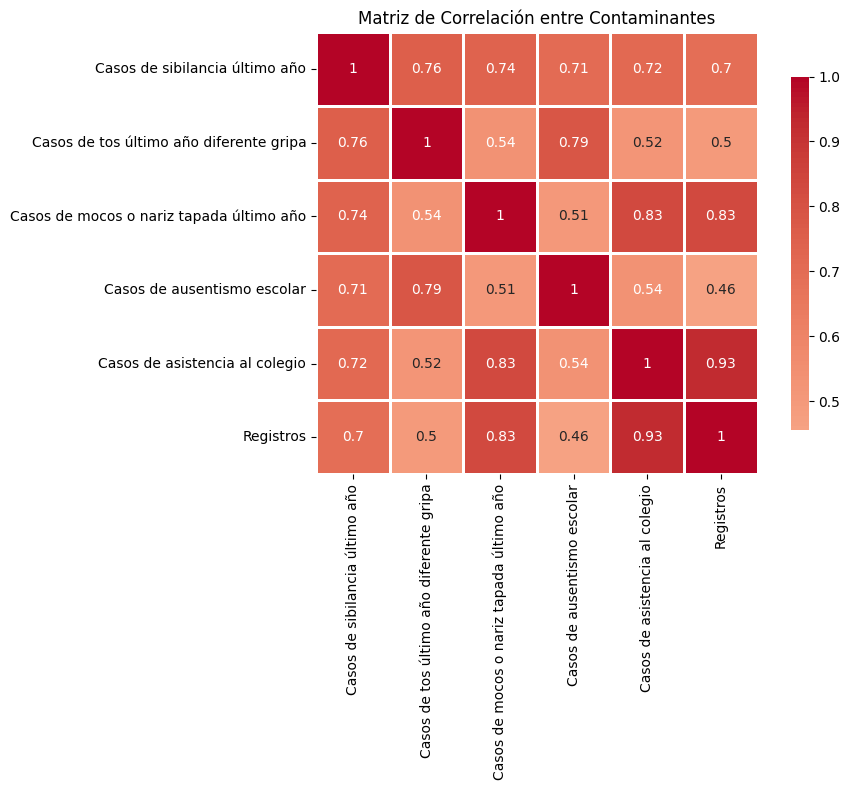

In [105]:
print("\n" + "="*60)
print("MATRIZ DE CORRELACIÓN")
print("="*60)

correlation = df[features].corr()
# Visualización de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Contaminantes')
plt.tight_layout()
plt.show()

In [ ]:
df_drop = df.drop(['Casos de ausentismo escolar', 'Casos de asistencia al colegio'], axis=1)
df = df_drop
df["Casos sintomas totales"] = df['Casos de sibilancia último año'] + df['Casos de tos último año diferente gripa'] + df['Casos de mocos o nariz tapada último año']
df.head()

,Año,Localidad,Sexo,Aseguramiento,Estrato,Casos de sibilancia último año,Casos de tos último año diferente gripa,Casos de mocos o nariz tapada último año,Registros,Casos sintomas totales
262,2020,BARRIOS UNIDOS,Hombre,Contributivo (EPS),2,0,0,1,7,1
263,2020,BARRIOS UNIDOS,Hombre,Contributivo (EPS),3,2,0,2,30,4
264,2020,BARRIOS UNIDOS,Hombre,Contributivo (EPS),4,1,0,3,5,4
265,2020,BARRIOS UNIDOS,Hombre,Subsidiado (EPSS),3,0,0,0,10,0
266,2020,BARRIOS UNIDOS,Mujer,Contributivo (EPS),2,1,0,1,3,2


In [107]:
output_path = os.path.join('datos_ninos', 'obs_aire_menores5anos_procesado.csv')
df.to_csv(output_path, index=False)
print(f"\nDataset final guardado en: {output_path}")


Dataset final guardado en: datos_ninos\obs_aire_menores5anos_procesado.csv
